# Temporal search engine

## Histogram analysis

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Data
data = pd.read_csv("../data/data_hists.csv", delimiter=";")

problemes = np.unique(data[data.columns[0]])

In [3]:
# Selecting one time series
name = 'Problemes/Client mécontent/insatisfait'
ts = data[data[data.columns[0]] == name]
ts = ts.drop(ts.columns[0],1)
print(ts.shape)


def prtdt(l):
    return(str(l[2])+str(l[1])+str(l[0]))

ts['Date'] = ts['Date'].apply(lambda x: prtdt(x.split("/", 3)))

# Sorting according to date
ts.sort_values("Date", axis=0, ascending=True, inplace=True)

(2744, 2)


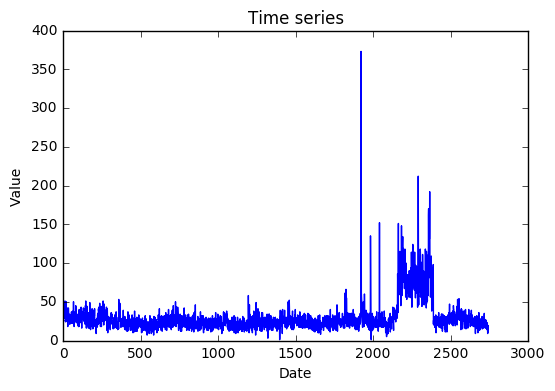

NameError: name 'rng' is not defined

In [4]:
# Plot hist
fig = plt.figure()

a=fig.add_subplot(1,1,1)
a.plot(range(len(ts['Somme'])), ts['Somme'])
a.set_title("Time series")
a.set_xlabel("Date")
a.set_ylabel("Value")

plt.show()
print(len(rng))
print(len(ts['Somme']))

# Time series analysis

/home/jonathan/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


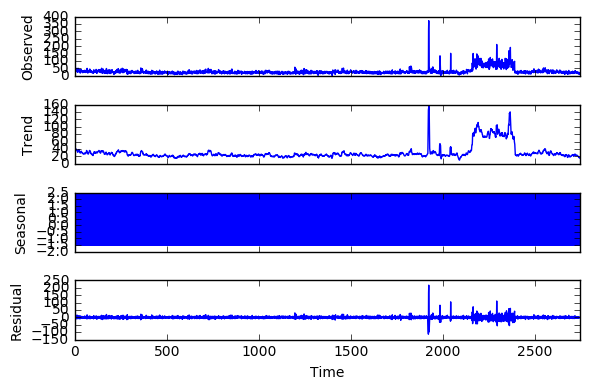

In [5]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(list(ts['Somme']), freq=7)
resplot = res.plot()

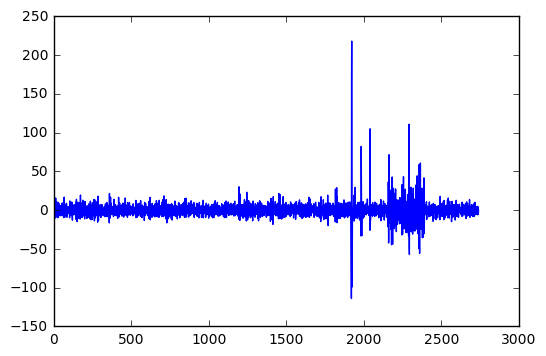

In [6]:
plt.plot(res.resid)

6.12193188392
9.36991517888


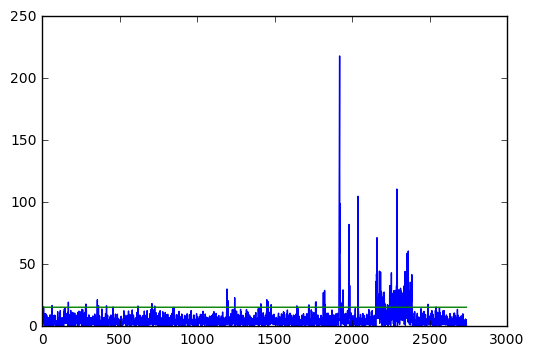

In [7]:
import math
math.isnan(res.resid[0])
ts = abs(res.resid[~np.isnan(res.resid)])

print(np.mean(ts))
print(np.sqrt(np.var(ts)))
thresh = np.mean(ts) + np.sqrt(np.var(ts))

plt.plot(ts)
plt.plot(thresh*np.ones(len(ts)))

In [8]:
from events_detection import *

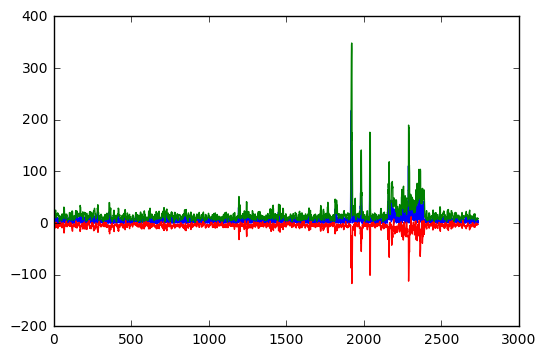

In [9]:
signal, avg, std = peaks_detection(ts, lag=5, thresh=3.5, influence=0.8)
plt.plot(ts)
plt.plot(avg+std*3.5)
plt.plot(avg-std*3.5)

[(37, 38), (51, 53), (62, 63), (64, 65), (88, 89), (99, 100)]

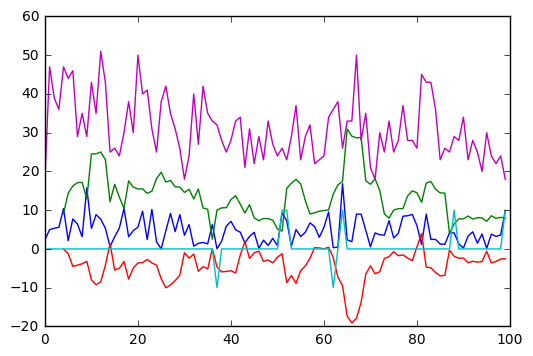

In [15]:
myts = ts[0:100]
mysignal, myavg, mystd = peaks_detection(myts)
plt.plot(myts)
plt.plot(myavg+mystd*3.5)
plt.plot(myavg-mystd*3.5)
plt.plot(mysignal*10)
plt.plot(res.observed[0:100])

events = events_list(mysignal)
events